In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv("df_norm.csv", 
                 index_col = 0)

In [3]:
class_names = df['CLASS']
class_names = class_names.tolist()
col_names = df.columns
class_label = np.unique(class_names)

In [4]:
df.shape

(200, 35)

In [5]:
X = df.drop('CLASS',axis=1)
Y = df['CLASS']

In [6]:
Y_bin = label_binarize(df['CLASS'], 
                       classes=class_label)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y_bin, 
                                                    test_size=0.2,
                                                    stratify=class_names)
y_true = np.argmax(y_test, axis = 1)

# Decision Tree

In [8]:
from sklearn import tree

In [9]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_res = DT.predict(X_test)
y_pred_DT = np.argmax(DT_res, axis=1)
y_predp_DT = DT.predict_proba(X_test)

In [10]:
DT_cm = confusion_matrix(y_true=y_true, 
                         y_pred=y_pred_DT)

Text(0.5, 1.0, 'Heatmap for Decision Tree Classification Model')

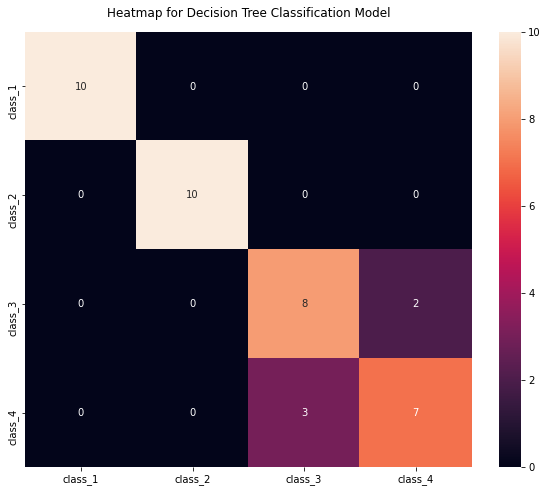

In [11]:
plt.figure(figsize = (10,8))
ax = plt.axes()
x_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for x-axis
y_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for y-axis
sns.heatmap(DT_cm,
            vmin=0,
            vmax=10,
            annot=True,
            fmt="d",
            ax = ax,
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels)
ax.set_title('Heatmap for Decision Tree Classification Model',pad=15)

In [12]:
print(classification_report(y_true, y_pred_DT, target_names=class_label))
print("Accuracy:",metrics.accuracy_score(y_true, y_pred_DT))

              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00        10
     class_2       1.00      1.00      1.00        10
     class_3       0.73      0.80      0.76        10
     class_4       0.78      0.70      0.74        10

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40

Accuracy: 0.875


In [13]:
DT_clf = OneVsRestClassifier(tree.DecisionTreeClassifier())
y_pred_ovr_DT = DT_clf.fit(X_train, y_train).predict_proba(X_test)

In [14]:
# Compute ROC curve and ROC area for each class
fpr_DT = dict()
tpr_DT = dict()
roc_auc_DT = dict()
for i in range(class_label.shape[0]):
    fpr_DT[i], tpr_DT[i], _ = roc_curve(y_test[:, i], y_pred_ovr_DT[:, i])
    roc_auc_DT[i] = auc(fpr_DT[i], tpr_DT[i])

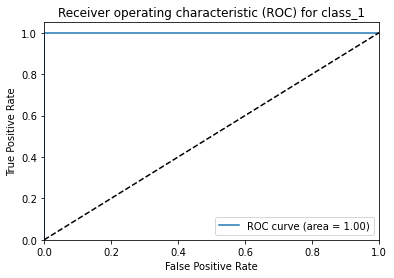

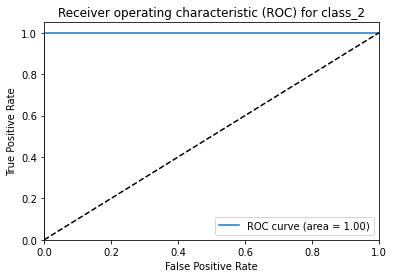

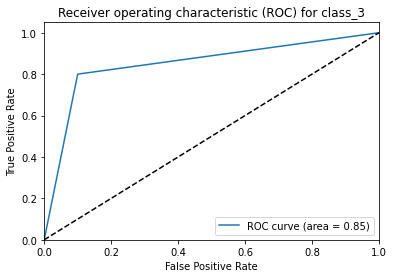

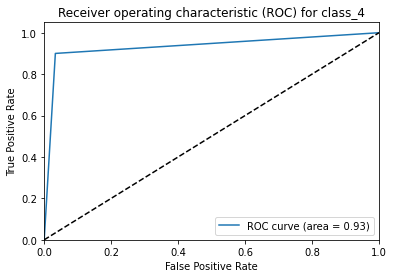

In [15]:
for i in range(class_label.shape[0]):
    plt.figure()
    plt.plot(fpr_DT[i], tpr_DT[i], label='ROC curve (area = %0.2f)' % roc_auc_DT[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) for %s' % class_label[i])
    plt.legend(loc="lower right")
    plt.show()

In [16]:
DT_kappa = cohen_kappa_score(y_true, y_pred_DT)
DT_kappa

0.8333333333333334

In [17]:
FP = DT_cm.sum(axis=0) - np.diag(DT_cm) 
FN = DT_cm.sum(axis=1) - np.diag(DT_cm)
TP = np.diag(DT_cm)
TN = DT_cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensibilidade, taxa de acerto, recall ou taxa de true positive 
TPR = TP/(TP+FN)
print("Sensibilidade:\t", TPR)
# Especificidade ou taxa de true negative
TNR = TN/(TN+FP) 
print("True Negative:\t", TNR)
# Precisao
PPV = TP/(TP+FP)
print("Precisão:\t", PPV)
# Predicao negativa
NPV = TN/(TN+FN)
print("Pred. Negativa:\t", NPV)
# False positive
FPR = FP/(FP+TN)
print("False Positive: ", FPR)
# False negative
FNR = FN/(TP+FN)
print("False Negative:\t", FNR)
# False discovery
FDR = FP/(TP+FP)
print("F Discovery:\t", FDR)
# Accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Acurácia:\t", ACC)    

Sensibilidade:	 [1.  1.  0.8 0.7]
True Negative:	 [1.         1.         0.9        0.93333333]
Precisão:	 [1.         1.         0.72727273 0.77777778]
Pred. Negativa:	 [1.         1.         0.93103448 0.90322581]
False Positive:  [0.         0.         0.1        0.06666667]
False Negative:	 [0.  0.  0.2 0.3]
F Discovery:	 [0.         0.         0.27272727 0.22222222]
Acurácia:	 [1.    1.    0.875 0.875]
